In [20]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#### Loading data set

In [11]:
dfa = pd.read_csv( "traj3.csv" )
len(dfa.index)

70

In [32]:
dfa.head()

,Unnamed: 0,copy,fasta,binEdges,RgHist,RgStart,RgEnd,RMSF
0,0,0,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],[0. 0. 0.21052632 0.66066482 0...,17.629680,13.458850,[12.73553784 14.23062392 12.10763548 ... 6.67...
1,1,1,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],[0. 0. 0.50692521 0.40581717 0...,17.672291,12.476428,[10.75759668 12.39561268 9.94118727 ... 5.81...
2,2,2,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],[0. 0. 0.05401662 0.66204986 0...,17.606146,14.193896,[13.81664589 15.11218285 13.40769073 ... 4.76...
3,3,3,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],[0. 0. 0.02354571 0.80055402 0...,17.621758,13.790629,[4.7032641 6.21502651 4.36357594 ... 3.445494...
4,4,4,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],[0. 0. 0. 0.24376731 0...,17.652820,15.384474,[12.29935684 13.89972468 11.56719311 ... 6.54...


### "inject answers"
This is a placeholder until I get statistics from the other dataset

In [12]:
dfb=dfa.copy()

In [18]:
ar =dfb['RgStart']
ar*=1.5
dfb['RgStart']=ar

ar =dfb['RgEnd']
ar*=1.35
dfb['RgEnd']=ar



### Apply threshold criterion 

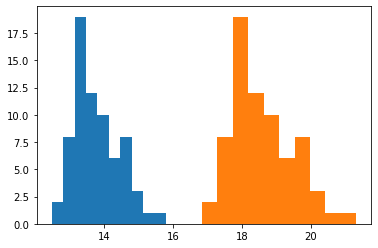

In [26]:
plt.hist(dfa['RgEnd'],label="A")
plt.hist(dfb['RgEnd'],label="B")

cutoff = 18.

In [31]:
df = pd.concat([dfa,dfb])
df['isFolded']=np.where(df['RgEnd']<cutoff,True,False)


### Create inputs/outputs for ML
We wish to use scalar data, so we are just going to select a subset of features here

In [50]:
feature_cols = ["RgHist","RgStart","RgEnd","RMSF"]
feature_cols = ["RgStart","RgEnd"]
X = df[feature_cols]
y = df.isFolded

### Learning
borrowed from https://www.datacamp.com/tutorial/decision-tree-classification-python

In [54]:
import sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [80]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=1) 

In [81]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Display

In [83]:
!pip3 install six

In [84]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [85]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

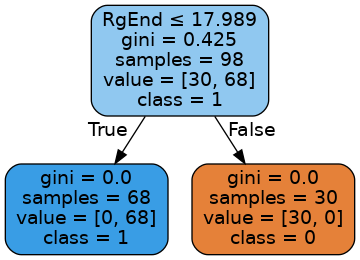

In [86]:
#graph.write_png('diabetes.png')
Image(graph.create_png())